In [12]:
import time
import os
os.environ["OMP_NUM_THREADS"] = "1"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from visualization import plot_region,plot_clusters
from dataset import load_dataset, load_agg_params
from transportation import compute_transportation_costs
import random
from clustering import cluster_demand_points, cluster_warehouses,cluster_items
from aggregated_model import solve_aggregated_model
from disaggregation import solve_disagg_stage1,solve_disagg_stage2,solve_disagg_stage3
from optimal_model import solve_opt_model


# Dataset

In [4]:
random.seed(0)
np.random.seed(0)

org_params  = load_dataset()
tr = compute_transportation_costs(org_params['df'], org_params['dp'], org_params['P']) 

# Visualization

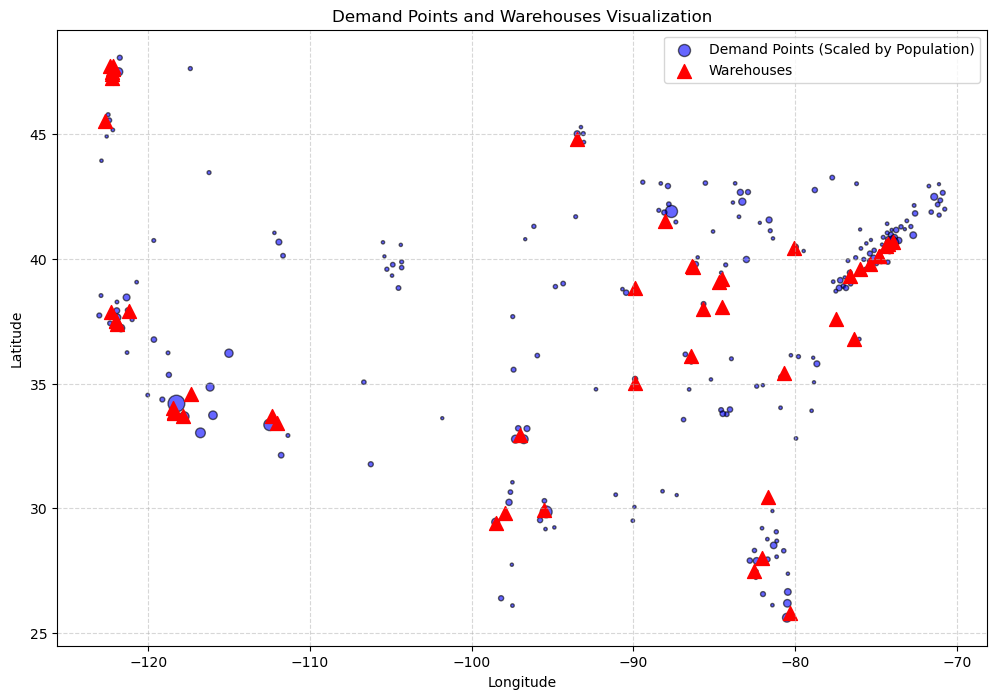

In [5]:
plot_region(org_params)

# Optimal Model

In [6]:
start_opt = time.time()
opt_obj=solve_opt_model(tr, org_params)
time_opt = time.time() - start_opt

Set parameter Username
Set parameter LicenseID to value 2636303
Academic license - for non-commercial use only - expires 2026-03-13
the optimal objective value:43641479.795793


# Clustering

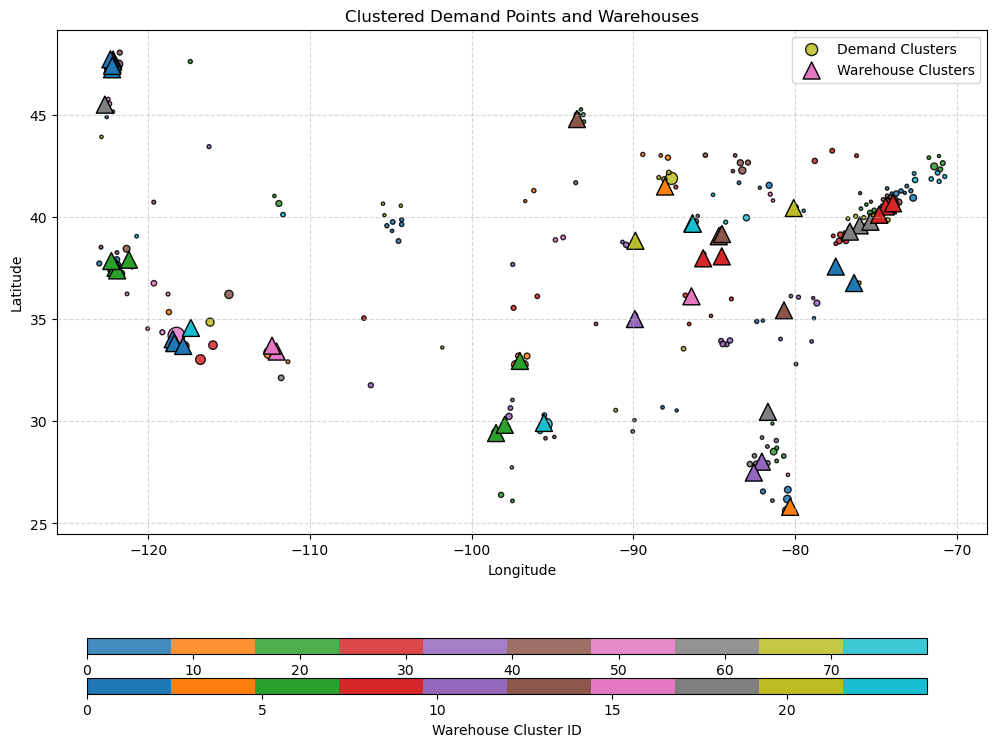

In [12]:
params_d={'dp': org_params['dp'], 'nd': 80}
dp_reduced, I_k,K,cluster_counts_d=cluster_demand_points(params_d)
    
params_w={'df': org_params['df'], 'nf': 25}
df_reduced, w_F,W,cluster_counts_f= cluster_warehouses(params_w)
    
params_p = {'P': org_params['P'], 'F': org_params['F'], 'T': org_params['T'], 'h':  org_params['h'], 'sh':  org_params['sh'], 
                'v':  org_params['v'], 'sum_demand':  org_params['sum_demand'], 'n_clusters': 50}
p_c,C,cluster_counts_p=cluster_items(params_p)

plot_clusters(dp_reduced, df_reduced)

# Aggregated_model

In [14]:
# Aggregated_params
agg_params =load_agg_params(org_params,tr, W, K, C, w_F, I_k, p_c, cluster_counts_d, cluster_counts_f, cluster_counts_p)

# Aggregated_model
start_agg = time.time()
agg_results=solve_aggregated_model(W, K, C, org_params['T'], agg_params)
time_agg = time.time() - start_agg

Set parameter Username
Set parameter LicenseID to value 2636303
Academic license - for non-commercial use only - expires 2026-03-13
AGG objective function value:47668759.085443


# Disaggregation Stages

In [16]:
start_disagg = time.time()
disagg_results_1=solve_disagg_stage1(W,K, C, I_k, org_params,agg_params,agg_results , max_workers=8)
    
    
disagg_results_2= solve_disagg_stage2(W,w_F,C,p_c,agg_params,agg_results,org_params,disagg_results_1)

greedy_obj=solve_disagg_stage3(C,p_c,tr,org_params, agg_params,disagg_results_2)
print(greedy_obj)


 Stage 1 Disaggregation Completed in: 8.98 seconds
 Stage 2 Disaggregation Completed in 2.22 seconds
stage 3 Disaggregation Completed: 8.391752481460571 seconds
46540072.07311131


# Algorithm Evaluation

Running for nf=5, nd=20, n_clusters=10
AGG objective function value:59177572.495616
 Stage 1 Disaggregation Completed in: 0.27 seconds
 Stage 2 Disaggregation Completed in 0.29 seconds
stage 3 Disaggregation Completed: 7.8797056674957275 seconds
49162260.37354674
Running for nf=10, nd=30, n_clusters=15
AGG objective function value:50728950.112792
 Stage 1 Disaggregation Completed in: 0.68 seconds
 Stage 2 Disaggregation Completed in 0.41 seconds
stage 3 Disaggregation Completed: 7.928377389907837 seconds
48171898.16983914
Running for nf=15, nd=40, n_clusters=20
AGG objective function value:49722632.630520
 Stage 1 Disaggregation Completed in: 1.22 seconds
 Stage 2 Disaggregation Completed in 0.55 seconds
stage 3 Disaggregation Completed: 7.835485458374023 seconds
48083902.71624078
Running for nf=20, nd=50, n_clusters=30
AGG objective function value:48840041.761671
 Stage 1 Disaggregation Completed in: 2.79 seconds
 Stage 2 Disaggregation Completed in 1.05 seconds
stage 3 Disaggregation

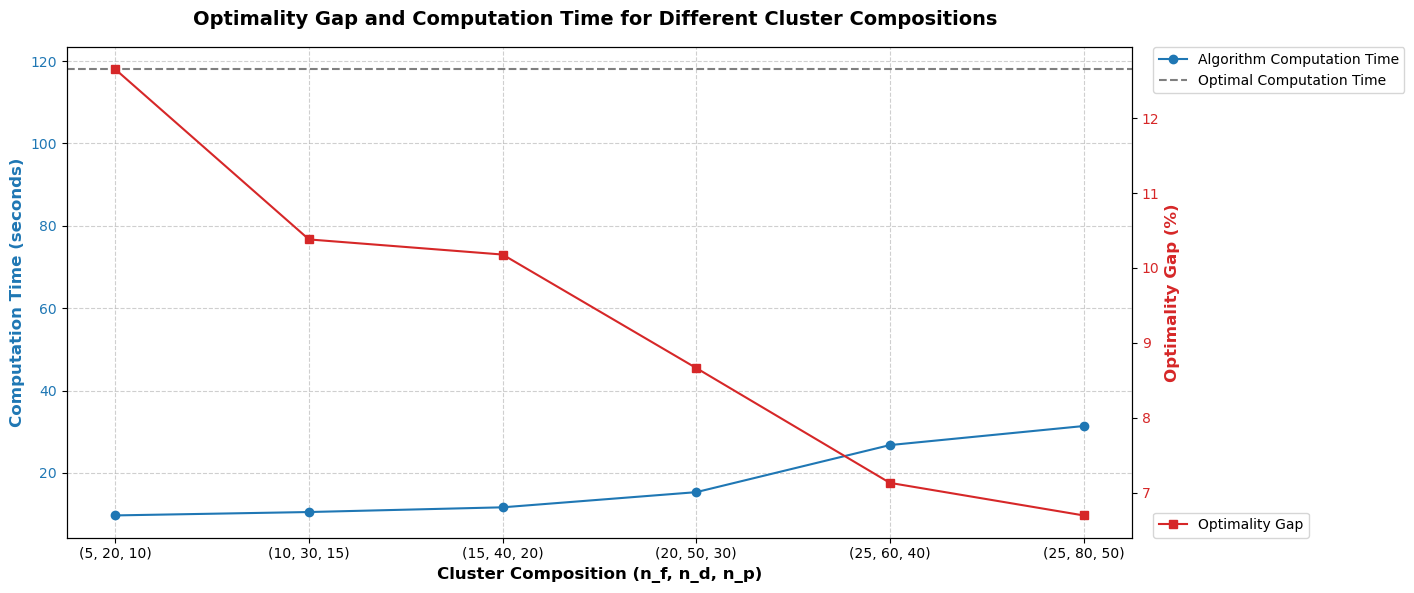

In [14]:
#cluster size (nf, nd, np)
test_cases = [ 
    (5, 20, 10), (10, 30, 15), (15, 40, 20),(20, 50, 30), (25,60,40),(25,80,50)
]


results = []

for nf, nd, n_clusters in test_cases:
    print(f"Running for nf={nf}, nd={nd}, n_clusters={n_clusters}") 
    # Clustering   
    
    params_d={'dp': org_params['dp'], 'nd': nd}
    dp_reduced, I_k,K,cluster_counts_d=cluster_demand_points(params_d)
    
    params_w={'df': org_params['df'], 'nf': nf}
    df_reduced, w_F,W,cluster_counts_f= cluster_warehouses(params_w)
    
    params_p = {'P': org_params['P'], 'F': org_params['F'], 'T': org_params['T'], 'h':  org_params['h'], 'sh':  org_params['sh'], 
                'v':  org_params['v'], 'sum_demand':  org_params['sum_demand'], 'n_clusters': n_clusters}
    p_c,C,cluster_counts_p=cluster_items(params_p)

    # Aggregated_params
    agg_params =load_agg_params(org_params,tr, W, K, C, w_F, I_k, p_c, cluster_counts_d, cluster_counts_f, cluster_counts_p)

    # Aggregated_model
    start_agg = time.time()
    agg_results=solve_aggregated_model(W, K, C, org_params['T'], agg_params)
    time_agg = time.time() - start_agg
 

    # Disaggregation Stages
    start_disagg = time.time()
    disagg_results_1=solve_disagg_stage1(W,K, C, I_k, org_params,agg_params,agg_results , max_workers=8)
    
    
    disagg_results_2= solve_disagg_stage2(W,w_F,C,p_c,agg_params,agg_results,org_params,disagg_results_1)

    greedy_obj=solve_disagg_stage3(C,p_c,tr,org_params, agg_params,disagg_results_2)
    print(greedy_obj)
    time_disagg = time.time() - start_disagg
    # optimality gap    
    
    opt_gap = ((greedy_obj - opt_obj) / opt_obj) * 100    
    total_time = time_agg + time_disagg
    
    
    #  results
    results.append({
        ('nf','nd','n_clusters'): (nf, nd,n_clusters),
        "opt_obj":opt_obj,
        "greedy_obj": greedy_obj,
        "opt_gap": opt_gap,
        "time_agg": time_agg,
        "time_disagg": time_disagg,
        "total_time": total_time,
        "time_opt":time_opt
    })

results_df = pd.DataFrame(results)

from visualization import plot_results

plot_results(results_df)
